In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import copy

# **EDA**
## **Data Cleaning**

In [2]:
# Load the data
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.shape

(28297, 11)

The Dataset consists of 28,297 rows (transactions) and 11 columns (features).

## **Handling Missing Values**

In [4]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64


## Here, the missing data is not random or scarce, so it's better to remove the rows and columns containing null values

In [5]:
# Removing Missing values
df = df.dropna()
df.shape

(28296, 11)

In [6]:
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28296.00,28296.00,28296.00,28296.00,28296.00,28296.00,28296.00,28296.0
mean,6.51,135743.11,766729.74,782382.74,848402.55,1191347.18,0.00,0.0
std,2.29,301321.69,2126156.00,2166648.40,2513911.25,3106487.60,0.05,0.0
min,1.00,1.77,0.00,0.00,0.00,0.00,0.00,0.0
25%,6.00,5966.46,0.00,0.00,0.00,0.00,0.00,0.0
50%,8.00,19501.96,19647.27,3685.92,0.00,0.00,0.00,0.0
75%,8.00,160111.75,138688.91,140767.35,365572.14,667597.96,0.00,0.0
max,8.00,10000000.00,22352310.12,22465998.18,24955238.07,28783585.38,1.00,0.0


### After dropping the missing value data points, we are left with 28,296 transactions

### Since the transactions of Merchants (M) are not available, they do not contribute to the model
### Finding any removing all Merchant transaction data points

In [7]:
# Removing Merchant rows as their Balance statement is missing and will be of no
## use
df = df[~df['nameDest'].str.startswith('M')]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0.0,0.0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [8]:
df.reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
2,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0.0,0.0
3,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0.0,0.0
4,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14378,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
14379,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
14380,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
14381,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


### Exploring the "Type" of transactions feature

['TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


<function matplotlib.pyplot.show(close=None, block=None)>

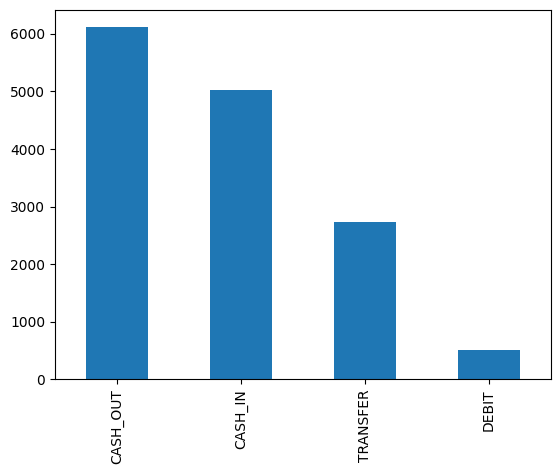

In [101]:
# Frequency of each transaction type
print(df['type'].unique())
df['type'].value_counts().plot(kind='bar')
plt.show()

### There are mainly 4 types of transactions, namely
### 1. Transfer: This category represents transfers of funds between accounts. Transfers can occur between a customer's own accounts or between accounts belonging to different customers.
### 2. Cash out:  This category represents transactions involving the withdrawal or "cashing out" of funds from an account.
### 3. Debit: This category represents debit card transactions, where funds are debited or subtracted from the account for purchases or payments.
### 4. Cash in: This category represents transactions where money is being deposited or "cashed in" to an account.

### The major difference between "Cash In" and "Transfer" is that "Cash In" indicates that a customer is adding funds to their account, such as depositing cash or checks while "Transfer" often used for moving money between accounts within the same bank

### The most amount of transactions are of "Cash Out" type followed by "Cash In" which indicates that there is a higher amount of cash outflow as compared to cash inflow.

In [10]:
# Distribution of normal tranasactions and fraudulent transactions
df['isFraud'].value_counts()

0.0    14299
1.0       84
Name: isFraud, dtype: int64

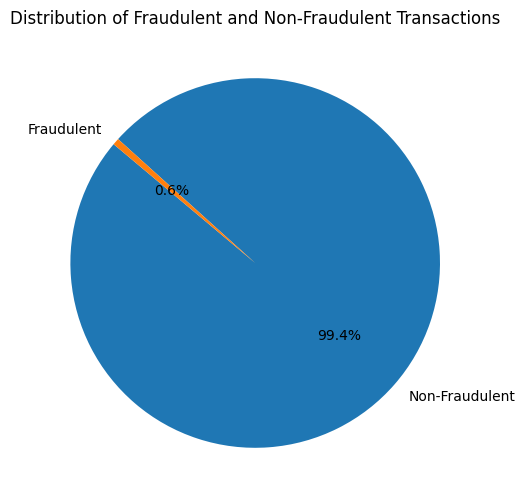

In [47]:
# Distribution of normal tranasactions and fraudulent transactions
fraud_counts = df['isFraud'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')

plt.show()

- ### Based on the above pie chart, the fraudulent transactions are tiny (0.6% of all transactions).
- ### Majority of the transactions are considered non-fradulent or "Normal"
- ### Fradulent transactions typically consists of a tiny proportion which - risks overfitting the model for non-fradulent transactions

## Current view of the dataset

In [16]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0.0,0.0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [62]:
df_numeric = df.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["feature"] = df_numeric.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                   for i in range(len(df_numeric.columns))]

print(vif_data)

          feature         VIF
0            step    1.803653
1          amount    1.822378
2   oldbalanceOrg  311.138893
3  newbalanceOrig  313.341338
4  oldbalanceDest    7.575602
5  newbalanceDest    8.533165
6         isFraud    1.059920
7  isFlaggedFraud         NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


### The features "oldbalanceOrg" and "newbalanceOrig" have a VIF of over 300 each.
### A Variance inflation factor > 10 is considered to be high collinearity
### This multicollinearity can be handled by combining both variables

In [67]:
# Feature Engineering
# diff: difference between new and old balance
df['balanceDiffOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

df['timeOfDay(hourly)'] = df['step'] % 24
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,timeOfDay(hourly)
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,-181.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,-181.00,-21182.00,1
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0.0,0.0,-5337.77,-1549.21,1
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0.0,0.0,-4465.00,147137.12,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0.0,0.0,-15325.00,46430.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0,0.00,78635.42,8
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0,0.00,7270.37,8
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0,0.00,-71114.64,8
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0,0.00,89346.61,8


## **Outlier Detection**
- ### Outliers are data points that deviate from the normal pattern of the data
- ### They are small in number and usually easy to find by means of visualizations such as scatter plot or boxplot

In [68]:
# Outlier Detection
## Using Z-score
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
outliers

<ipython-input-68-7b86ae585ea1>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-68-7b86ae585ea1>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-68-7b86ae585ea1>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,timeOfDay(hourly)
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17277864.84,17356500.26,NaN,NaN,NaN,NaN,NaN
28292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10085462.79,10014348.15,NaN,NaN,NaN,NaN,NaN
28294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


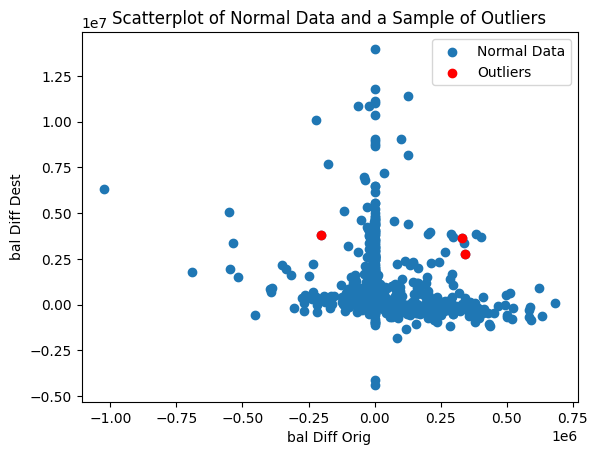

In [83]:
# Selecting normal data subset
normal_data_subset = df.sample(n=1000,random_state=34)

# Selecting outlier data subset
outliers_subset = outliers.sample(n=100,random_state=34)  # Adjust the number as needed

# Create a scatterplot for the selected normal data
plt.scatter(normal_data_subset['balanceDiffOrig'], normal_data_subset['balanceDiffDest'], label='Normal Data')

# Create a scatterplot for the selected outliers
plt.scatter(outliers_subset['balanceDiffOrig'], outliers_subset['balanceDiffDest'], color='red', label='Outliers')

plt.xlabel('bal Diff Orig')
plt.ylabel('bal Diff Dest')
plt.legend()

plt.title('Scatterplot of Normal Data and a Sample of Outliers')
plt.show()

- ### Some of the outliers can be visualized in the scatterplot above
- ### The likelihood of outliers being fradulent transactions are high
- ### There we preserve the outliers in the data

In [84]:
# Splitting the dataset
# X: Features
# Y: Targets

X = df.drop(columns=['isFraud','nameOrig','nameDest'],axis=1)
y = df['isFraud']

In [85]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,timeOfDay(hourly)
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,0.0,-181.00,0.00,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,0.0,-181.00,-21182.00,1
9,1,DEBIT,5337.77,41720.0,36382.23,41898.00,40348.79,0.0,-5337.77,-1549.21,1
10,1,DEBIT,9644.94,4465.0,0.00,10845.00,157982.12,0.0,-4465.00,147137.12,1
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.00,51513.44,0.0,-15325.00,46430.44,1
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,0.0,0.00,17277864.84,17356500.26,0.0,0.00,78635.42,8
28292,8,CASH_OUT,7270.37,0.0,0.00,1523685.68,1530956.05,0.0,0.00,7270.37,8
28293,8,CASH_OUT,113043.31,0.0,0.00,10085462.79,10014348.15,0.0,0.00,-71114.64,8
28294,8,CASH_OUT,89346.62,0.0,0.00,112673.41,202020.02,0.0,0.00,89346.61,8


In [86]:
y

2        1.0
3        1.0
9        0.0
10       0.0
15       0.0
        ... 
28291    0.0
28292    0.0
28293    0.0
28294    0.0
28295    0.0
Name: isFraud, Length: 14383, dtype: float64

## **Label Encoding**
### Applying label encoding on the "type" feature

In [87]:
# Label Encoding
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])

In [88]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,timeOfDay(hourly)
2,1,3,181.00,181.0,0.00,0.00,0.00,0.0,-181.00,0.00,1
3,1,1,181.00,181.0,0.00,21182.00,0.00,0.0,-181.00,-21182.00,1
9,1,2,5337.77,41720.0,36382.23,41898.00,40348.79,0.0,-5337.77,-1549.21,1
10,1,2,9644.94,4465.0,0.00,10845.00,157982.12,0.0,-4465.00,147137.12,1
15,1,1,229133.94,15325.0,0.00,5083.00,51513.44,0.0,-15325.00,46430.44,1
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,78635.42,0.0,0.00,17277864.84,17356500.26,0.0,0.00,78635.42,8
28292,8,1,7270.37,0.0,0.00,1523685.68,1530956.05,0.0,0.00,7270.37,8
28293,8,1,113043.31,0.0,0.00,10085462.79,10014348.15,0.0,0.00,-71114.64,8
28294,8,1,89346.62,0.0,0.00,112673.41,202020.02,0.0,0.00,89346.61,8


# **Normalizing the data**

In [91]:
columns_to_normalize = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','balanceDiffOrig','balanceDiffDest']
# Create an instance of Normalizer
normalizer = Normalizer(norm='l2')
X[columns_to_normalize] = normalizer.transform(X[columns_to_normalize]).round(4)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [92]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,timeOfDay(hourly)
2,1,3,0.5774,0.5774,0.000,0.0000,0.0000,0.0,-0.5774,0.0000,1
3,1,1,0.0060,0.0060,0.000,0.7071,0.0000,0.0,-0.0060,-0.7071,1
9,1,2,0.0662,0.5172,0.451,0.5194,0.5002,0.0,-0.0662,-0.0192,1
10,1,2,0.0446,0.0206,0.000,0.0501,0.7298,0.0,-0.0206,0.6797,1
15,1,1,0.9530,0.0637,0.000,0.0211,0.2143,0.0,-0.0637,0.1931,1
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,1,0.0032,0.0000,0.000,0.7055,0.7087,0.0,0.0000,0.0032,8
28292,8,1,0.0034,0.0000,0.000,0.7054,0.7088,0.0,0.0000,0.0034,8
28293,8,1,0.0080,0.0000,0.000,0.7096,0.7046,0.0,0.0000,-0.0050,8
28294,8,1,0.3390,0.0000,0.000,0.4275,0.7665,0.0,0.0000,0.3390,8


# **Splitting dataset**

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=42,random_state=42)

In [94]:
# Create and evaluate Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(copy.deepcopy(X_train), copy.deepcopy(y_train))

logistic_preds = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_report = classification_report(y_test, logistic_preds)

In [95]:
# Create and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(copy.deepcopy(X_train), copy.deepcopy(y_train))

rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

In [96]:
# Create and evaluate Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(copy.deepcopy(X_train), copy.deepcopy(y_train))

svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_report = classification_report(y_test, svm_preds)

In [97]:
print("Logistic Regression Results:")
print(f"Test Set Accuracy: {logistic_accuracy}")
print(logistic_report)

Logistic Regression Results:
Test Set Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [98]:
print("Random Forest Results:")
print(f"Test Set Accuracy: {rf_accuracy}")
print(rf_report)


Random Forest Results:
Test Set Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [99]:
print("Support Vector Machine (SVM) Results:")
print(f"Test Set Accuracy: {svm_accuracy}")
print(svm_report)


Support Vector Machine (SVM) Results:
Test Set Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# In all of the above algorithms, the accuracy of the model is 100% in the Testing set